# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Put your path to coinc_lmfit.py here
import sys
sys.path.insert(1, '..\..\..\coinc_lmfit')
import coinc_lmfit as cl

# Simple example

Creating the standard plot I originally wrote these functions for.

In [3]:
pairlist = ('1 & 3', '1 & 4', '2 & 3', '2 & 4')
# change this path if you want to run this notebook
arrlist = [cl.make_nice(np.load(
                '../freespace_datasets/06_19_22/' +\
                    'Polarizer_2Lamps/pairs{}_{}.npy'.format(
                                    p[0],p[-1]))) for p in pairlist]

# Takes about 3 minutes to run using the 06/19/22 Two-Lamp VV Polarizer data.
coinc_lists = []
for nums, arr in zip(pairlist, arrlist):
    coinc_lists.append(cl.coinc_sum(arr, maxiter=2000))

In [4]:
start1 = 0
end1 = 15
start2 = 19.5
end2 = 33.5
slice1, slice2 = cl.make_slices([(start1, end1), (start2, end2)],
                                                    coinc_lists[0][0])

In [5]:
res_list = []
for coinc_list in coinc_lists:
    firstrun = [x[slice1] for x in coinc_list]
    secondrun = [x[slice2] for x in coinc_list]
    
    res1 = cl.fit_sin(*firstrun,  ci_verbose=False)
    res2 = cl.fit_sin(*secondrun, ci_verbose=False)
    
    res_list.append((res1, res2))

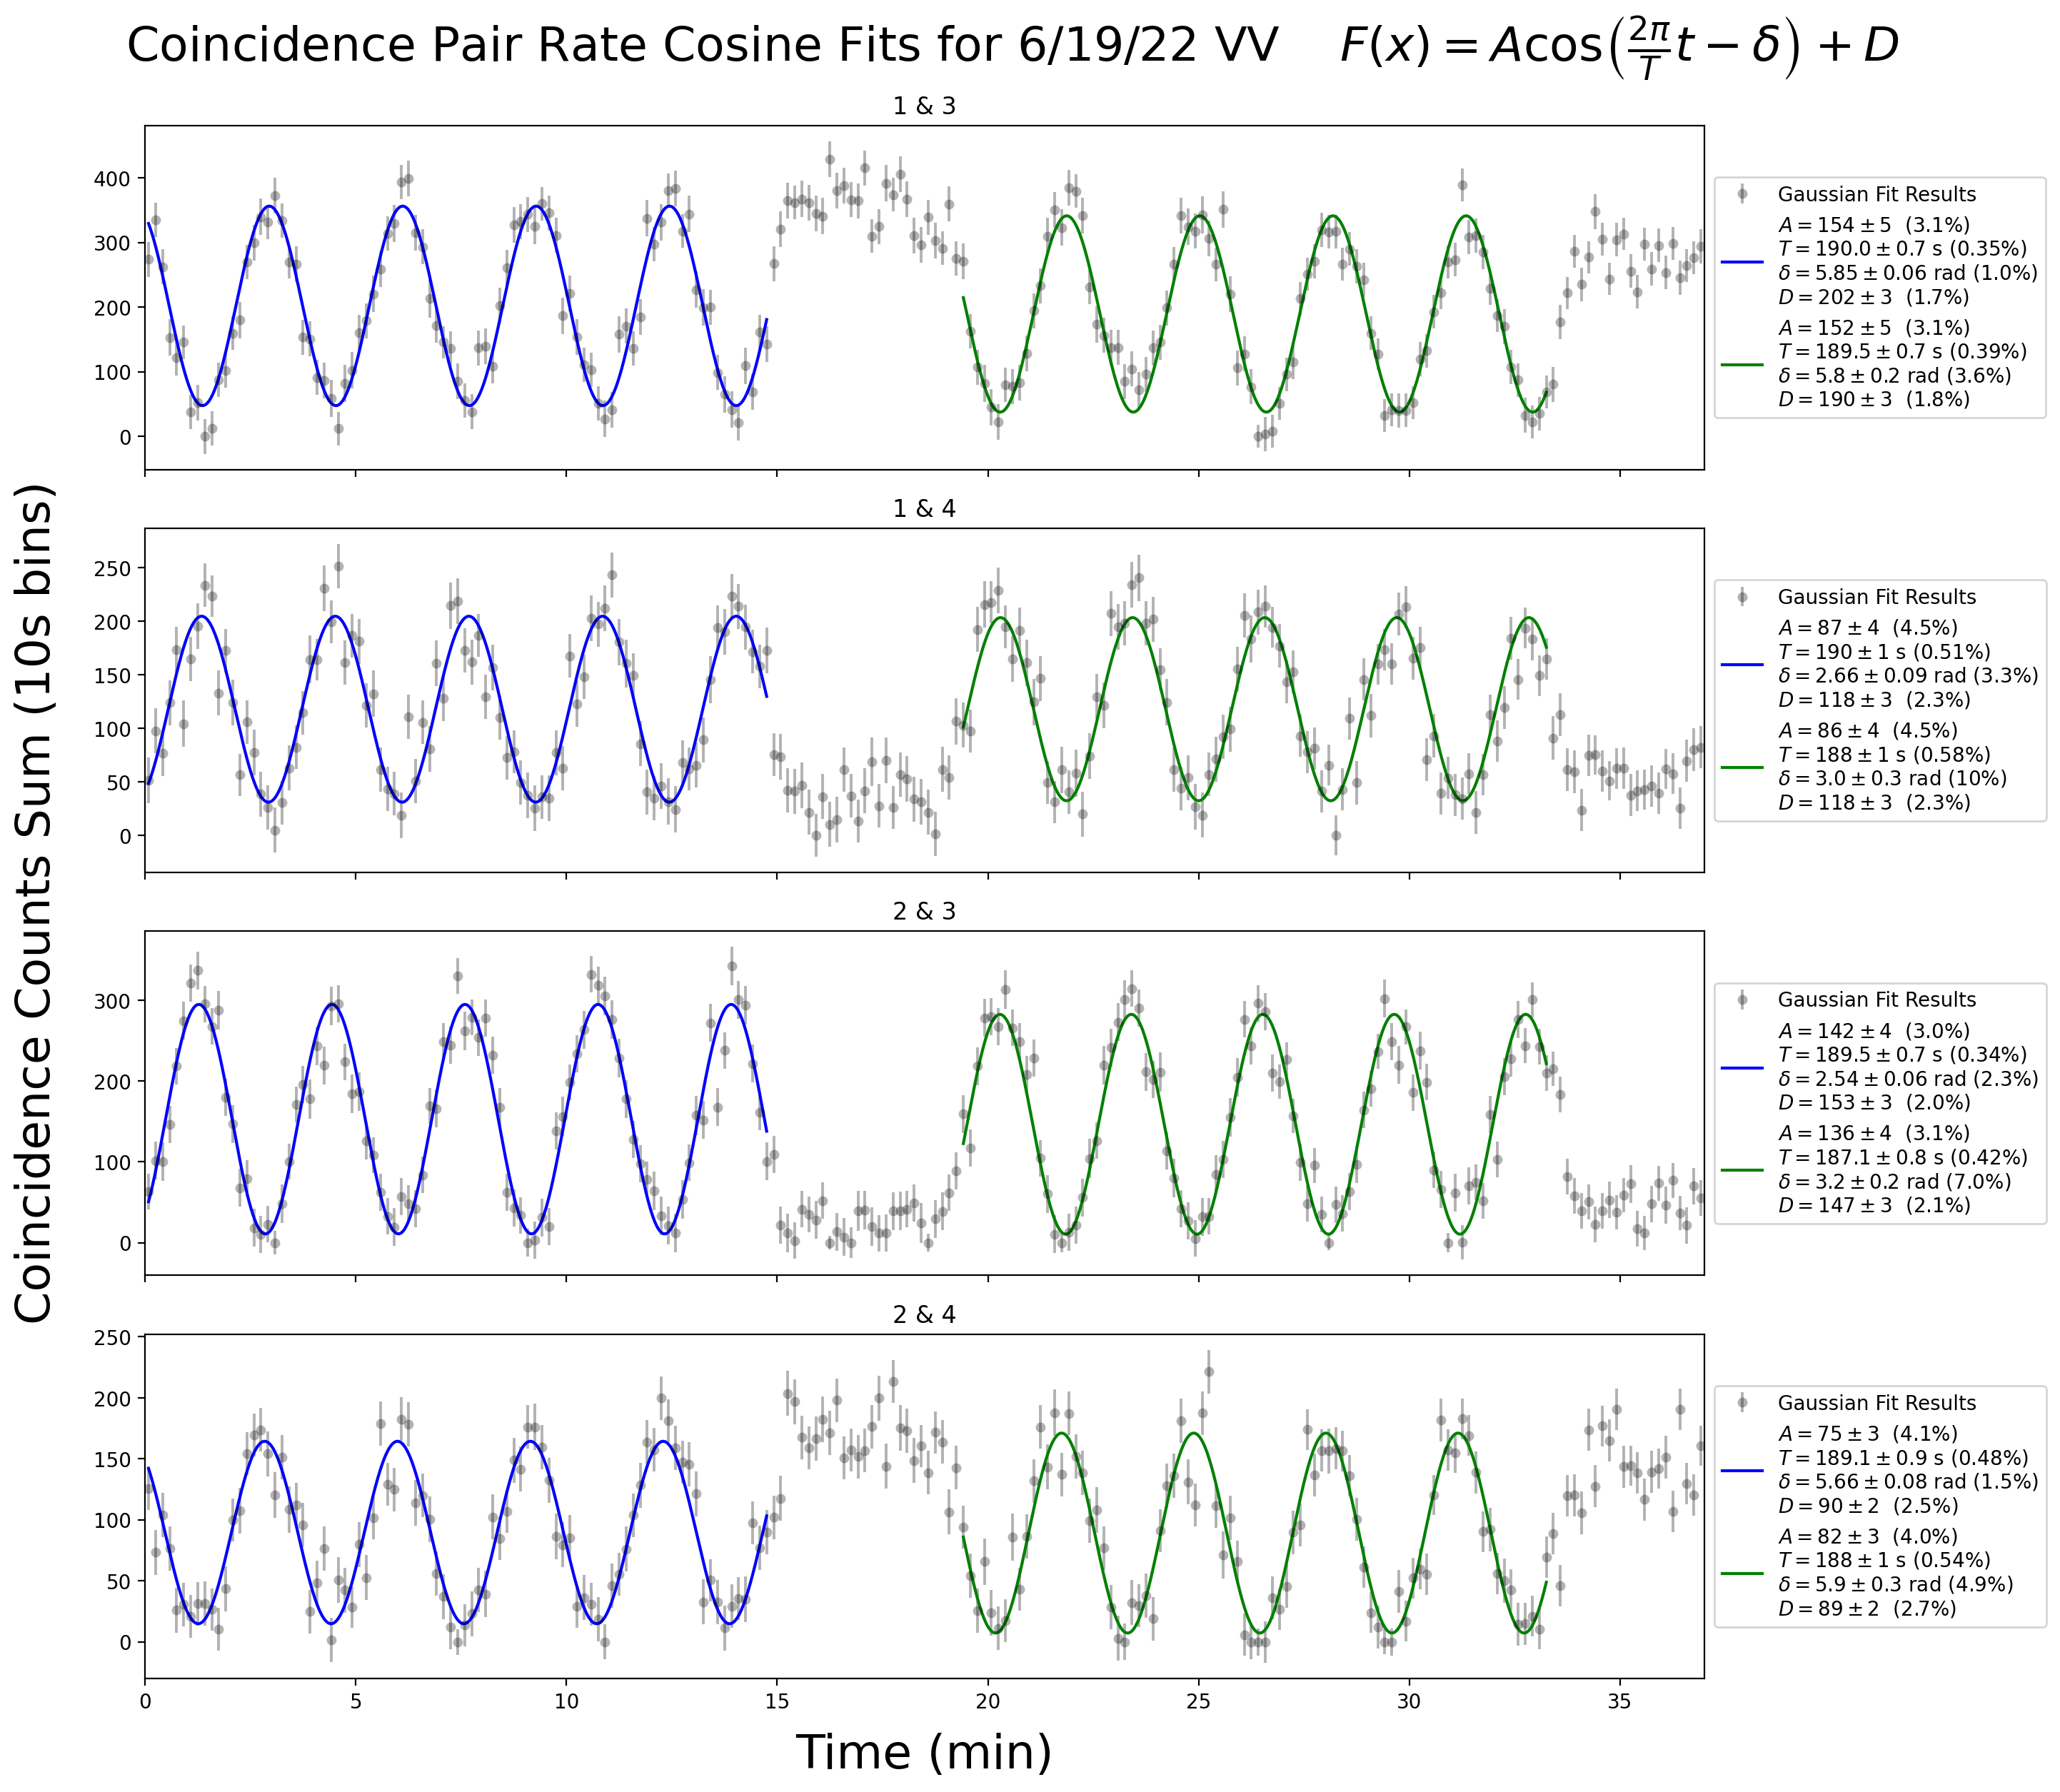

In [6]:
fig, axs, extra = cl.plot_chpairs(coinc_lists, res_list,
                                [[slice1, slice2]]*4, ylabel_binwidth=10,
                                 figure_kwargs=dict(dpi=200))

# Examples of the figure can be modified
for ax, pair in zip(axs, pairlist):
    ax.set_xlim((0,37))
    ax.set_title(pair)
    
fig.suptitle(r'Coincidence Pair Rate Cosine Fits for 6/19/22 VV    '+\
             r'$ F(x) = A \cos \left( \frac{2 \pi}{T} t - \delta \right) + D$',
                                                                fontsize=24)
plt.tight_layout()
plt.show()

# Demonstration of plotting function flexibility

This is only an example, ignore the infinite uncertainties.

In [7]:
slices1 = cl.make_slices([(0,15),(19.5, 33.5)], coinc_lists[0][0])
slices2 = cl.make_slices([(0,8), (9,14), (20, 30)], coinc_lists[0][0])

reslist1 = [cl.fit_sin(*[arr[sl] for arr in coinc_lists[0]],
                            suppress_warnings=True) for sl in slices1]
reslist2 = [cl.fit_sin(*[arr[sl] for arr in coinc_lists[1]],
                            suppress_warnings=True) for sl in slices2]
# Suppressing warnings because these are not good fitting widows, just examples.

In [8]:
reslists = [reslist1, reslist2, []]
sliceslists = [slices1, slices2, []]

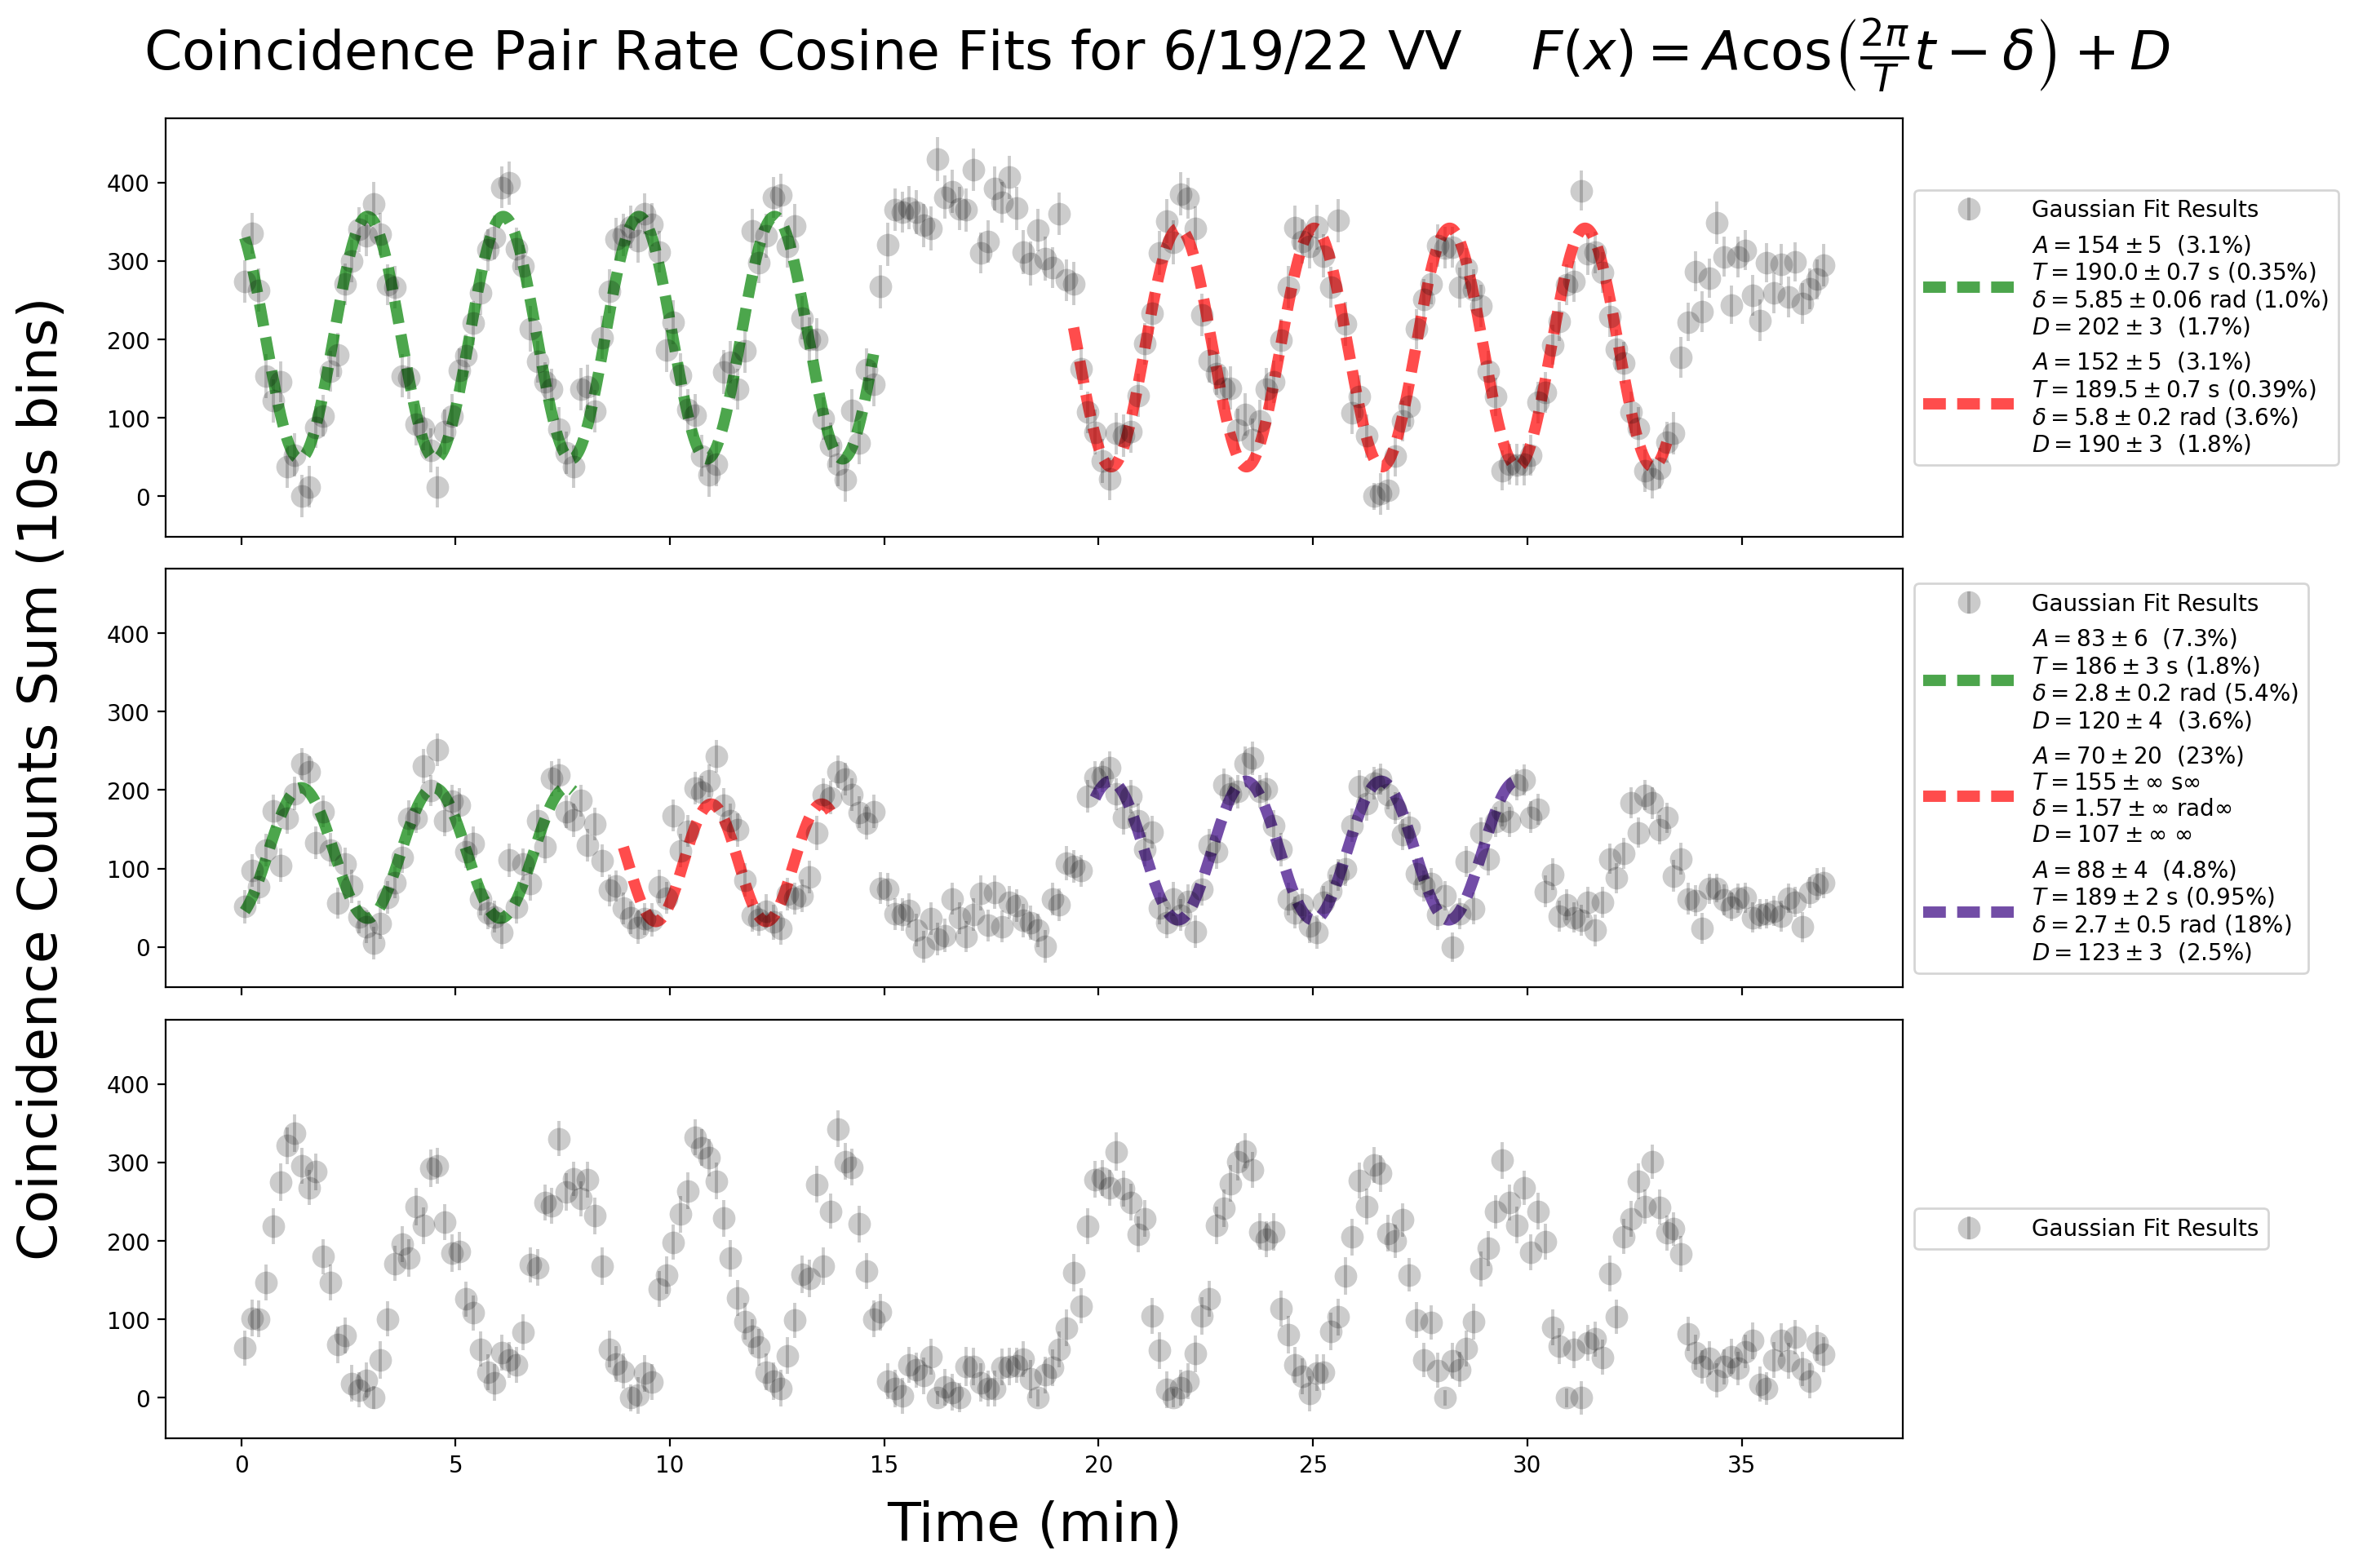

In [9]:
fig, axs, extra = cl.plot_chpairs(coinc_lists[:-1],
                reslists, sliceslists, ylabel_binwidth=10,
                legend_kwargs=dict(fancybox=True, handlelength=4),
                figure_kwargs=dict(sharey=True, dpi=200),
                errorbar_kwargs=dict(markersize=10, alpha=0.2),
                sin_kwargs=dict(dashes=(2,1), alpha=0.7, lw=5),
                color_list=('g', 'r', 'xkcd:indigo'))
# Infinite uncertainty is from where lmfit.conf_interval failed

fig.suptitle(r'Coincidence Pair Rate Cosine Fits for 6/19/22 VV    '+\
             r'$ F(x) = A \cos \left( \frac{2 \pi}{T} t - \delta \right) + D$',
                                                                fontsize=24)

plt.tight_layout()
plt.show()